## Caso práctico Video Game Sales
Descargar dataset de Kaggle: https://www.kaggle.com/gregorut/videogamesales

Importante: usar el dataset CSV proporcionado para este ejercicio ya que contiene valores nulos creados para el apartado de valores faltantes.

## Importar librerías

Importar pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Carga de CSV

In [2]:
df = pd.read_csv("../dataset/video_games.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Inspección de los datos

Verifica los primeros registros del conjunto de datos y obtén un resumen de las estadísticas generales.

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Tratamiento de valores faltantes

Verifica si hay valores faltantes y, si es necesario, realiza el tratamiento adecuado para cada caso.

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [23]:
df['Year'] = df['Year'].fillna(df['Year'].mean())

In [24]:
publisher_mode = df['Publisher'].mode()[0]
df['Publisher'] = df['Publisher'].fillna(publisher_mode)

In [25]:
df.isnull().sum()

Rank                 0
Name                 0
Platform             0
Year                 0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Sales_in_Millions    0
Genre_Codes          0
First_Letter         0
Global_Sales_iva     0
dtype: int64

### Estadísticas de agrupación

Agrupa los datos por la columna 'Platform' y calcula las ventas totales para cada plataforma.

In [35]:
ventas_por_plataforma = df.groupby('Platform')['Global_Sales'].sum()

ventas_por_plataforma

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

### Visualización de datos

Crea un gráfico de barras para mostrar las ventas globales por plataforma.

Text(0.5, 1.0, 'Ventas Globales por Plataforma')

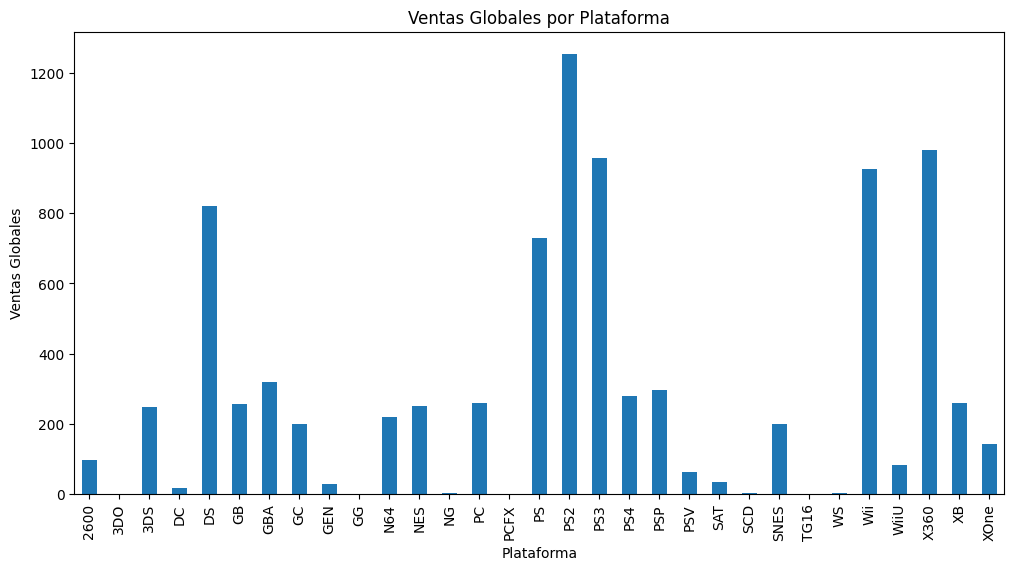

In [7]:
plt.figure(figsize=(12, 6))  
ventas_por_plataforma.plot(kind='bar')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales por Plataforma')

### Creación de nuevas características

Crea una nueva característica 'Sales_in_Millions' para hacer que las ventas sean más legibles, que muestre las ventas totales pero en millones.

In [8]:
df['Sales_in_Millions'] = df['Global_Sales'] / 1000000

### Agrupación avanzada:

Agrupa por 'Year' y 'Platform' y calcula las ventas totales.

In [27]:
ventas_por_year_platform = df.groupby(['Year', 'Platform'])['Global_Sales'].sum()

print(ventas_por_year_platform)

Year    Platform
1980.0  2600        11.38
1981.0  2600        35.77
1982.0  2600        28.86
1983.0  2600         5.83
        NES         10.96
                    ...  
2016.0  X360         0.83
        XOne        12.37
2017.0  PS4          0.03
        PSV          0.02
2020.0  DS           0.29
Name: Global_Sales, Length: 257, dtype: float64


### Tratamiento de columnas de texto

Transforma el género en una variable categórica numerada.

In [28]:
df['Genre_Codes'] = df['Genre'].astype('category').cat.codes
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_in_Millions,Genre_Codes,First_Letter,Global_Sales_iva
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,8.274000e-05,10,W,100.1154
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.024000e-05,4,S,48.6904
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.582000e-05,6,M,43.3422
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.300000e-05,10,W,39.9300
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3.137000e-05,7,P,37.9577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1.000000e-08,4,W,0.0121
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1.000000e-08,8,M,0.0121
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,1.000000e-08,6,S,0.0121
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,1.000000e-08,5,K,0.0121


### Correlación entre características

Examina la correlación entre las ventas en diferentes regiones utilizando la función corr() de pandas.

In [29]:
ventas_region_corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()

ventas_region_corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737
EU_Sales,0.767727,1.000000,0.435584,0.726385
JP_Sales,0.449787,0.435584,1.000000,0.290186
Other_Sales,0.634737,0.726385,0.290186,1.000000


### Operaciones con strings 

Crea una nueva característica que contenga la primera letra del nombre del juego

In [30]:
df['First_Letter'] = df['Name'].str[0]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_in_Millions,Genre_Codes,First_Letter,Global_Sales_iva
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,8.274000e-05,10,W,100.1154
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.024000e-05,4,S,48.6904
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.582000e-05,6,M,43.3422
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.300000e-05,10,W,39.9300
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3.137000e-05,7,P,37.9577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1.000000e-08,4,W,0.0121
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1.000000e-08,8,M,0.0121
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,1.000000e-08,6,S,0.0121
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,1.000000e-08,5,K,0.0121


### Recuento

Cuenta cuántos juegos comienzan con cada letra.

In [31]:
conteo_letras = df['First_Letter'].value_counts()

conteo_letras

S    1909
T    1755
M    1430
D    1252
N     924
B     891
C     880
P     860
F     772
R     717
A     667
G     608
W     604
H     535
L     449
K     416
J     403
E     283
I     238
O     190
Y     153
V     152
U     151
Z      93
X      84
1      27
Q      27
2      24
3      12
7      11
4      10
0      10
.      10
i       7
5       7
p       6
d       5
[       5
e       4
t       4
u       3
9       2
n       2
'       1
w       1
6       1
¡       1
f       1
h       1
Name: First_Letter, dtype: int64

### Ordenación de datos

Ordena el DataFrame por ventas globales en orden descendente.

In [32]:
df_ordenado = df.sort_values('Global_Sales', ascending=False)

df_ordenado

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_in_Millions,Genre_Codes,First_Letter,Global_Sales_iva
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,8.274000e-05,10,W,100.1154
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.024000e-05,4,S,48.6904
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.582000e-05,6,M,43.3422
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.300000e-05,10,W,39.9300
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3.137000e-05,7,P,37.9577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,1.000000e-08,11,B,0.0121
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01,1.000000e-08,5,J,0.0121
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01,1.000000e-08,3,T,0.0121
16189,16192,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.00,0.01,0.00,0.00,0.01,1.000000e-08,6,S,0.0121


### Reset de índice

Si en algún momento hemos filtrado el DataFrame o lo hemos alterado de manera que el índice ya no es una secuencia continua de enteros, puede ser útil restablecer el índice.

In [33]:
df_reiniciado = df_ordenado.reset_index(drop=True)

df_reiniciado

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_in_Millions,Genre_Codes,First_Letter,Global_Sales_iva
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,8.274000e-05,10,W,100.1154
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.024000e-05,4,S,48.6904
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.582000e-05,6,M,43.3422
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.300000e-05,10,W,39.9300
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3.137000e-05,7,P,37.9577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,1.000000e-08,11,B,0.0121
16594,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01,1.000000e-08,5,J,0.0121
16595,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01,1.000000e-08,3,T,0.0121
16596,16192,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.00,0.01,0.00,0.00,0.01,1.000000e-08,6,S,0.0121


### Eliminación de columnas innecesarias
Podemos eliminar columnas que no necesitaremos para futuros análisis. Por ejemplo, podemos eliminar la columna 'Rank'.

In [34]:
df_sin_rank = df.drop('Rank', axis=1)

df_sin_rank

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_in_Millions,Genre_Codes,First_Letter,Global_Sales_iva
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,8.274000e-05,10,W,100.1154
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.024000e-05,4,S,48.6904
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.582000e-05,6,M,43.3422
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.300000e-05,10,W,39.9300
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3.137000e-05,7,P,37.9577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1.000000e-08,4,W,0.0121
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1.000000e-08,8,M,0.0121
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,1.000000e-08,6,S,0.0121
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,1.000000e-08,5,K,0.0121


### Identificación de Outliers

Podemos usar el método del rango intercuartil (IQR) para detectar outliers en la columna 'Global_Sales'.

Elimina los outliers u obtén un dataframe sin outliers en la columna GlobalSales.

In [17]:
Q1 = df['Global_Sales'].quantile(0.25) 

Q3 = df['Global_Sales'].quantile(0.75) 

IQR = Q3 - Q1
IQR

0.41

In [18]:
limite_infrerior = Q1 - 1.5 * IQR
liminte_superior = Q3 + 1.5 * IQR
filter = (df['Global_Sales'] >= limite_infrerior) & (df['Global_Sales'] <= liminte_superior)

In [19]:
df_no_outlier = df.loc[filter]
print(df.shape)
print(df_no_outlier.shape)

(16598, 14)
(14705, 14)


### Uso de apply para operaciones de columna

Supongamos que queremos crear una nueva columna que sea GlobalSales pero con el IVA añadido, por ejemplo global_sales_iva

In [20]:
Colum_Sales_iva = 1.21
df['Global_Sales_iva'] = df['Global_Sales'] * Colum_Sales_iva

print(df['Global_Sales_iva'])


0        100.1154
1         48.6904
2         43.3422
3         39.9300
4         37.9577
           ...   
16593      0.0121
16594      0.0121
16595      0.0121
16596      0.0121
16597      0.0121
Name: Global_Sales_iva, Length: 16598, dtype: float64


### Uso de iloc para seleccionar datos

iloc es útil para seleccionar filas y columnas por posición. Por ejemplo, si queremos seleccionar las primeras 5 filas y las primeras 3 columnas.

In [21]:
selec_colum = df.iloc[:5, :3]

print(selec_colum)

   Rank                      Name Platform
0     1                Wii Sports      Wii
1     2         Super Mario Bros.      NES
2     3            Mario Kart Wii      Wii
3     4         Wii Sports Resort      Wii
4     5  Pokemon Red/Pokemon Blue       GB


### Guardar DataFrame

Finalmente, guardamos el DataFrame con todas las nuevas características y transformaciones en un nuevo archivo CSV.

 

In [22]:
df.to_csv('../dataset/nuevo_dataframe.csv', index=False)